# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Preprocessing

In [ ]:
#downloading data from yahoo finance
import yfinance as yf

data = yf.download('AMZN', start = "1997-05-15", end = "2021-07-08")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [ ]:
data['Date'] = data.index

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data = data[['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       6076 non-null   datetime64[ns, UTC]
 1   Adj Close  6076 non-null   float64            
 2   Close      6076 non-null   float64            
 3   High       6076 non-null   float64            
 4   Low        6076 non-null   float64            
 5   Open       6076 non-null   float64            
 6   Volume     6076 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 332.4 KB


In [ ]:
data.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
6071,2021-06-30 00:00:00+00:00,172.007996,172.007996,173.580002,171.750000,172.052994,48080000
6072,2021-07-01 00:00:00+00:00,171.648499,171.648499,172.850006,170.470993,171.730499,40742000
6073,2021-07-02 00:00:00+00:00,175.548996,175.548996,175.585999,171.845993,172.582001,63388000
6074,2021-07-06 00:00:00+00:00,183.787003,183.787003,184.274002,176.449997,176.505493,134896000
6075,2021-07-07 00:00:00+00:00,184.828995,184.828995,186.710007,183.945496,185.869003,106562000


In [ ]:
#Used to check to see if there are any null values. It is important to do it because otherwise our visualizations are going to be really negatively affected
any_null = data.isnull().values.any()
print(any_null)

False


In [ ]:
#Now we see that datetime is in object format so we will convert it to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#We do it to sort the values by ascending order
data = data.sort_values(by='Date')

In [ ]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,0.121875,1443120000
1,1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,0.098438,294000000
2,1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,0.088021,122136000
3,1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,0.086458,109344000
4,1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,0.081771,377064000


In [ ]:
#Extracting the Month
data['month'] = data['Date'].dt.month

In [ ]:
#Feature Engineering
data['Daily Return'] = data['Close'].pct_change()

In [ ]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,month,Daily Return
0,1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,0.121875,1443120000,5,NaN
1,1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,0.098438,294000000,5,-0.117028
2,1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,0.088021,122136000,5,-0.012040
3,1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,0.086458,109344000,5,-0.042685
4,1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,0.081771,377064000,5,-0.127392


In [ ]:
data=data.dropna()

In [ ]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,month,Daily Return
1,1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,0.098438,294000000,5,-0.117028
2,1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,0.088021,122136000,5,-0.012040
3,1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,0.086458,109344000,5,-0.042685
4,1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,0.081771,377064000,5,-0.127392
5,1997-05-22 00:00:00+00:00,0.069792,0.069792,0.072396,0.065625,0.071875,235536000,5,-0.021891


# Exploratory Data Analysis (EDA)

There are 6077 rows which means that this is measure of 6077 days of amazon stocks as each row coresponds to each day where the first day is 15th April 1997 and the last day is 8th July 2021. There are 7 variables(columns) which are noted below:

Date: The date that corresponds to the amazon stock

Open: The Opening Price of the stock on that day

High: The highest price or the peak of the stock that day

Low: The lowest price of the stock that day

Close: The closing price of the stock that day

Adj Close: Closing price adjusted to reflect the value after accounting for any corporate actions

Volume: The amounts of stock for that day

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

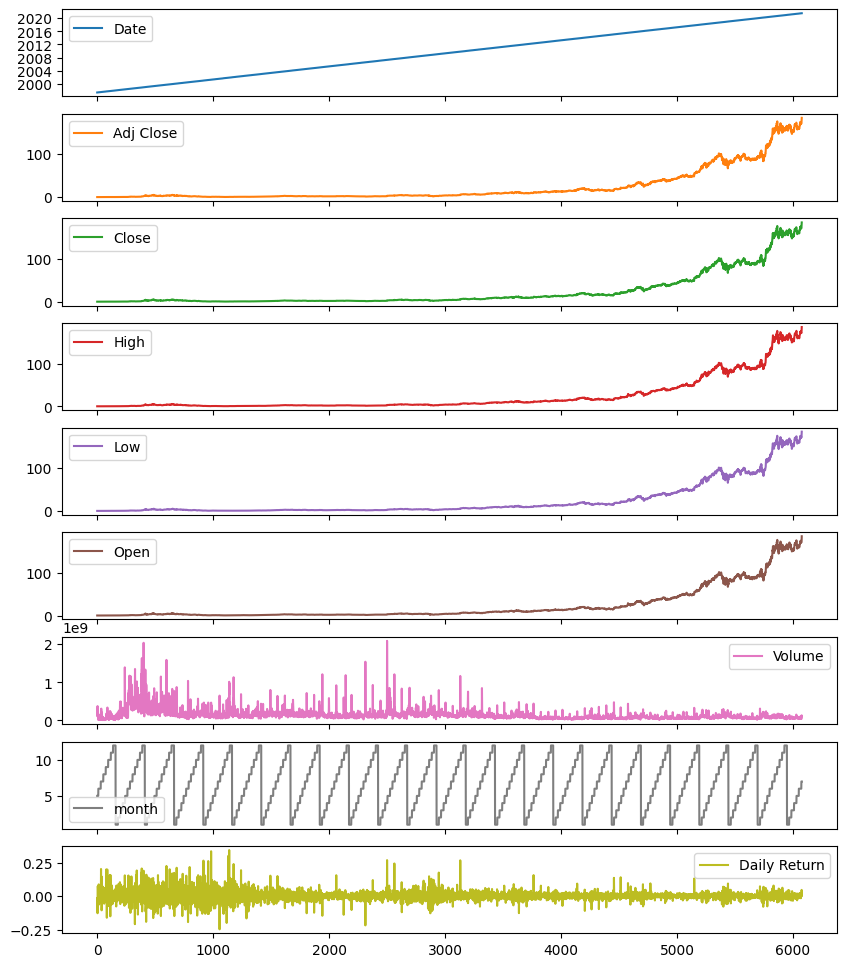

In [ ]:
#Data Visualizations to get a better sense of the data
data.plot(subplots=True, figsize=(10,12))

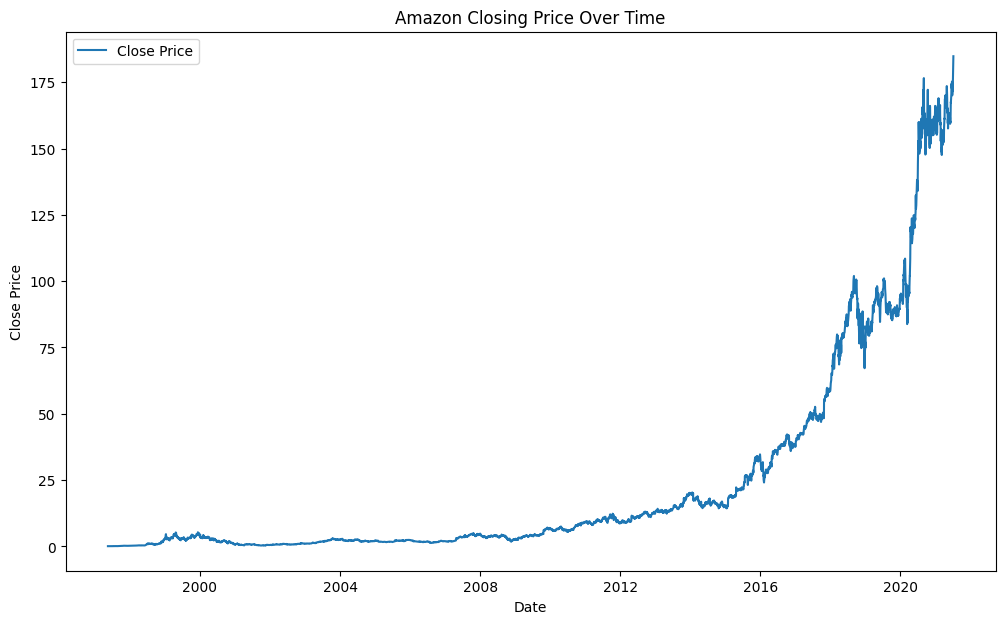

In [ ]:
# Plot the closing price over time using a Line Plot to get a sense of long term stock trends
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Amazon Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


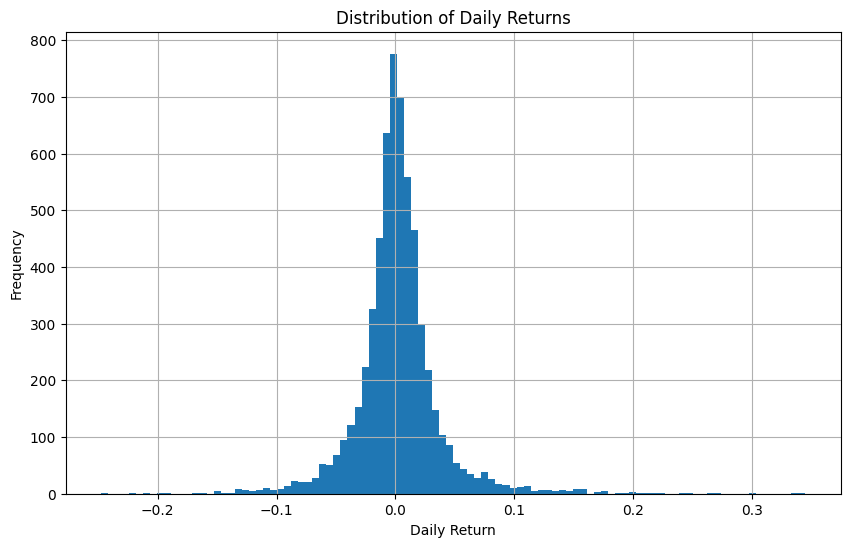

In [ ]:
data['Daily Return'].hist(bins=100, figsize=(10, 6))
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


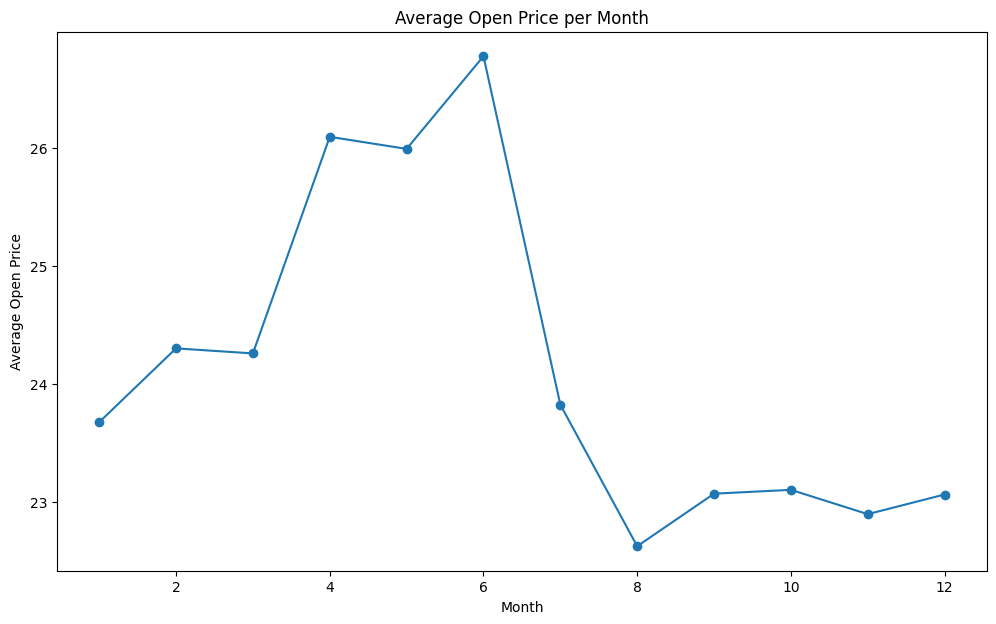

In [ ]:
#Helps identify what months have higher or lower prices on average
monthly_avg_open = data.groupby('month')['Open'].mean()

plt.figure(figsize=(12, 7))
plt.plot(monthly_avg_open.index, monthly_avg_open.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Open Price')
plt.title('Average Open Price per Month')
plt.show()

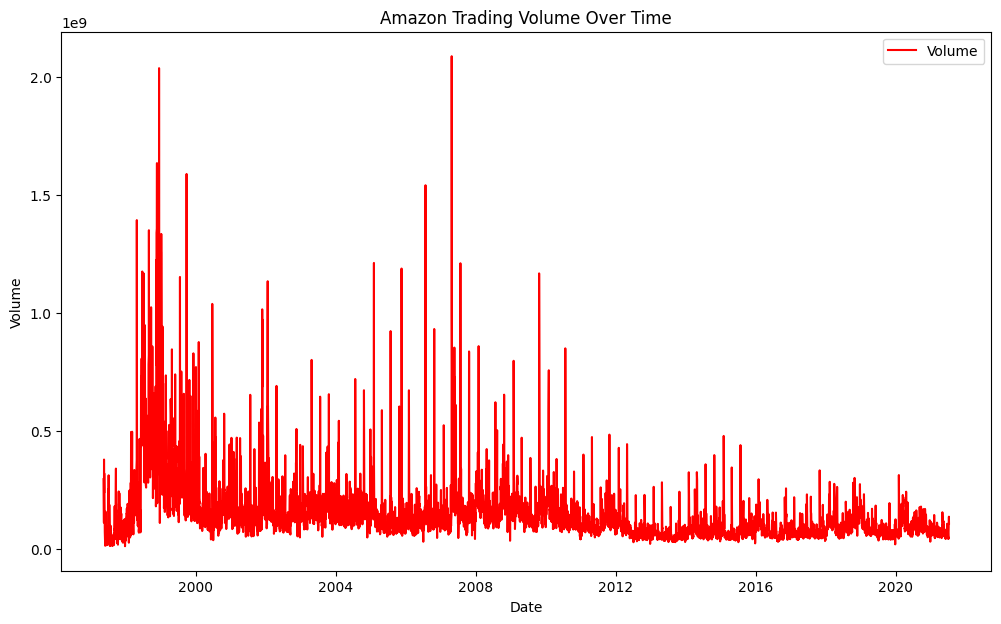

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['Volume'], label='Volume', color='red')
plt.title('Amazon Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

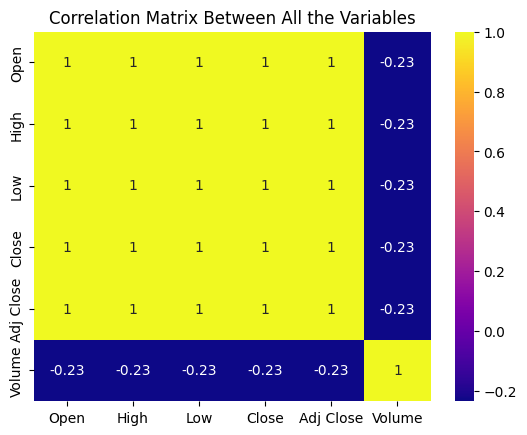

In [ ]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix Between All the Variables')
plt.show()

# Modeling

In [ ]:
#Importing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
feature_variables = ['Open', 'Daily Return']
target_variables= ['Close']

X = data[feature_variables]
Y = data[target_variables]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [ ]:
model= LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5201881324216817


In [ ]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Training R²: {r2_train}, Test R²: {r2_test}")

Training RMSE: 0.7121469899983947, Test RMSE: 0.7212406896603115
Training R²: 0.9996776158569523, Test R²: 0.9996767270715536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Decision Tree Regressor")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")


Decision Tree Regressor
Training RMSE: 0.0, Test RMSE: 0.6697829504339279
Training R²: 1.0, Test R²: 0.999721210075746


In [ ]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)


xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nXGBoost Regressor")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")



XGBoost Regressor
Training RMSE: 0.299189560111748, Test RMSE: 0.9553518722375189
Training R²: 0.9999430775642395, Test R²: 0.9994328022003174


In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regressor
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nLasso Regressor")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")

# Ridge Regressor
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nRidge Regressor")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")



Lasso Regressor
Training RMSE: 0.7384698590014913, Test RMSE: 0.7363996692955883
Training R²: 0.999653343031872, Test R²: 0.9996629952152084

Ridge Regressor
Training RMSE: 0.7127218239644949, Test RMSE: 0.7194662594048563
Training R²: 0.9996770951999788, Test R²: 0.9996783157773582


# Overfitting

In [ ]:
feature_variables = ['Open', 'High', 'Adj Close', 'Low', 'Volume']
target_variables= ['Close']

X = data[feature_variables]
Y = data[target_variables]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.431956913704333e-21
